In [36]:
import pandas as pd

In [37]:
hotel = pd.read_csv('hotel_bookings_clean.csv')

In [38]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [39]:
hotel.head(5)

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  arrival_date_month  stays_in_weekend_nights  \
0                          1                   7                        0   
1                          1                   7                        0   
2                          1                   7                        0   
3                          1                   7                        0   
4                          1                   7                        0   

   stays_in_week_nights  adults  children  babies  ...  reserved_room_type_G  \
0                     0       2       0.0       0  ...                     0   
1                     0       2       0.0       0  ...                     0   
2                     1       1       0.0       0  ...                     0   
3                     1       1       0.0       0  ...                     0   
4                     2       2       0.0       0  ...                     0   

   reserved_room_type_H  reserved_room_type_L  deposit_type_No_Deposit  \
0                     0                     0                        1   
1                     0                     0                        1   
2                     0                     0                        1   
3                     0                     0                        1   
4                     0                     0                        1   

   deposit_type_Non_Refund  deposit_type_Refundable  customer_type_Contract  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0                    0                        1                              0  
1                    0                        1                              0  
2                    0                        1                              0  
3                    0                        1                              0  
4                    0                        1                              0  

[5 rows x 53 columns]

In [40]:
# corelation
corr_metrics = hotel.corr()
corr_metrics.style.background_gradient()

In [41]:
hotel.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

In [42]:
hotel.drop(['children'],axis=1, inplace=True)

In [43]:
# droping high correlation fields
features = hotel.drop(['arrival_date_month', 'arrival_date_week_number', 'stays_in_week_nights'],axis=1,inplace=True)

In [44]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

In [45]:
# train-test split
X = hotel.drop(['is_canceled'],axis=1)
y = hotel['is_canceled']

In [46]:
scaler = StandardScaler()
features = scaler.fit_transform(X)

In [47]:
pd.DataFrame(features).head(5)

0         1         2         3         4         5         6   \
0  2.225879 -1.685305 -0.931606  0.244780 -0.081641 -0.180343 -0.103195   
1  5.921785 -1.685305 -0.931606  0.244780 -0.081641 -0.180343 -0.103195   
2 -0.908624 -1.685305 -0.931606 -1.493796 -0.081641 -0.180343 -0.103195   
3 -0.852484 -1.685305 -0.931606 -1.493796 -0.081641 -0.180343 -0.103195   
4 -0.843127 -1.685305 -0.931606  0.244780 -0.081641 -0.180343 -0.103195   

        7         8         9   ...       38        39        40        41  \
0 -0.09151 -0.254947 -0.720802  ... -0.13365 -0.071183 -0.007095  0.375755   
1 -0.09151 -0.254947 -0.720802  ... -0.13365 -0.071183 -0.007095  0.375755   
2 -0.09151 -0.254947 -0.720802  ... -0.13365 -0.071183 -0.007095  0.375755   
3 -0.09151 -0.254947 -0.720802  ... -0.13365 -0.071183 -0.007095  0.375755   
4 -0.09151 -0.254947  0.540435  ... -0.13365 -0.071183 -0.007095  0.375755   

         42        43        44        45        46        47  
0 -0.373396 -0.036889 -0.188059 -0.069558  0.576466 -0.516283  
1 -0.373396 -0.036889 -0.188059 -0.069558  0.576466 -0.516283  
2 -0.373396 -0.036889 -0.188059 -0.069558  0.576466 -0.516283  
3 -0.373396 -0.036889 -0.188059 -0.069558  0.576466 -0.516283  
4 -0.373396 -0.036889 -0.188059 -0.069558  0.576466 -0.516283  

[5 rows x 48 columns]

In [48]:
hotel.head(5)

is_canceled  lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
0            0        342                          1                        0   
1            0        737                          1                        0   
2            0          7                          1                        0   
3            0         13                          1                        0   
4            0         14                          1                        0   

   adults  babies  is_repeated_guest  previous_cancellations  \
0       2       0                  0                       0   
1       2       0                  0                       0   
2       1       0                  0                       0   
3       1       0                  0                       0   
4       2       0                  0                       0   

   previous_bookings_not_canceled  required_car_parking_spaces  ...  \
0                               0                            0  ...   
1                               0                            0  ...   
2                               0                            0  ...   
3                               0                            0  ...   
4                               0                            0  ...   

   reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   deposit_type_No_Deposit  deposit_type_Non_Refund  deposit_type_Refundable  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   customer_type_Contract  customer_type_Group  customer_type_Transient  \
0                       0                    0                        1   
1                       0                    0                        1   
2                       0                    0                        1   
3                       0                    0                        1   
4                       0                    0                        1   

   customer_type_Transient-Party  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 49 columns]

In [49]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(features)

PCA()

In [50]:
exp_varience = pca.explained_variance_ratio_

In [51]:
exp_varience

array([9.39132808e-02, 8.32643661e-02, 5.64092323e-02, 5.16552722e-02,
       4.33727702e-02, 3.86085588e-02, 3.41172296e-02, 3.19719221e-02,
       2.94175545e-02, 2.69347578e-02, 2.45328909e-02, 2.30815752e-02,
       2.29384545e-02, 2.26371100e-02, 2.22456251e-02, 2.16469059e-02,
       2.14602679e-02, 2.11390361e-02, 2.09992333e-02, 2.08365597e-02,
       2.07335631e-02, 2.06669114e-02, 2.04687773e-02, 2.01194680e-02,
       1.99322565e-02, 1.95317395e-02, 1.91279332e-02, 1.74802281e-02,
       1.69976113e-02, 1.67572717e-02, 1.54228779e-02, 1.37342411e-02,
       1.20789661e-02, 1.15615460e-02, 9.74003855e-03, 8.56863641e-03,
       7.65355943e-03, 7.19365094e-03, 4.91700277e-03, 3.90033992e-03,
       2.23077818e-03, 7.33614921e-32, 4.84661823e-32, 3.02904344e-32,
       2.50249538e-32, 1.14911190e-32, 9.38705884e-33, 9.90481834e-34])

Text(0.5, 0, 'pricipal component')

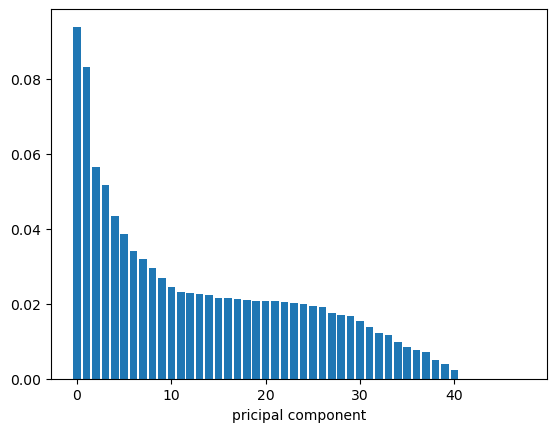

In [52]:
fig, ax = plt.subplots()
ax.bar(range(48), exp_varience)
ax.set_xlabel('pricipal component')

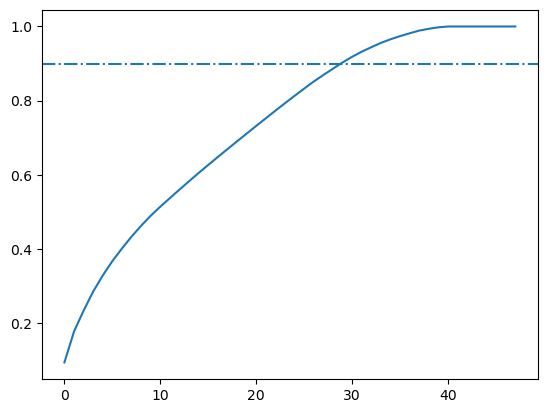

In [53]:
import numpy as np

cum_exp_varience = np.cumsum(exp_varience)

fig, ax = plt.subplots()
ax.plot(range(48), cum_exp_varience)
ax.axhline(y=0.9, linestyle='dashdot')
n_components=6

pca = PCA(n_components, random_state=20)
pca.fit(features)
pca_projection = pca.transform(features)

In [54]:
X.head()

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  adults  \
0        342                          1                        0       2   
1        737                          1                        0       2   
2          7                          1                        0       1   
3         13                          1                        0       1   
4         14                          1                        0       2   

   babies  is_repeated_guest  previous_cancellations  \
0       0                  0                       0   
1       0                  0                       0   
2       0                  0                       0   
3       0                  0                       0   
4       0                  0                       0   

   previous_bookings_not_canceled  required_car_parking_spaces  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   total_of_special_requests  ...  reserved_room_type_G  reserved_room_type_H  \
0                          0  ...                     0                     0   
1                          0  ...                     0                     0   
2                          0  ...                     0                     0   
3                          0  ...                     0                     0   
4                          1  ...                     0                     0   

   reserved_room_type_L  deposit_type_No_Deposit  deposit_type_Non_Refund  \
0                     0                        1                        0   
1                     0                        1                        0   
2                     0                        1                        0   
3                     0                        1                        0   
4                     0                        1                        0   

   deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   customer_type_Transient  customer_type_Transient-Party  
0                        1                              0  
1                        1                              0  
2                        1                              0  
3                        1                              0  
4                        1                              0  

[5 rows x 48 columns]

In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [56]:
hotel['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [57]:
# train-test split
from sklearn.model_selection import train_test_split

In [58]:
# Decison Tree model
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Evaluation Metrics
from sklearn.metrics import classification_report

In [78]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,y, random_state=20)

In [79]:
tree = DecisionTreeClassifier(random_state=10)

In [80]:
tree.fit(train_features, train_labels)

DecisionTreeClassifier(random_state=10)

In [81]:
pred = tree.predict(test_features)

In [82]:
class_report = classification_report(test_labels, pred)

In [83]:
print("Decison Tree:", class_report)

Decison Tree:               precision    recall  f1-score   support

           0       0.84      0.84      0.84     18739
           1       0.73      0.73      0.73     11064

    accuracy                           0.80     29803
   macro avg       0.78      0.78      0.78     29803
weighted avg       0.80      0.80      0.80     29803



In [84]:
# logistic regression
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=10)
reg.fit(train_features, train_labels)

pred_log = reg.predict(test_features)

from sklearn.metrics import classification_report

class_log = classification_report(test_labels, pred_log)

print("Logistic Regression :", class_log)

Logistic Regression :               precision    recall  f1-score   support

           0       0.72      0.97      0.83     18739
           1       0.89      0.37      0.53     11064

    accuracy                           0.75     29803
   macro avg       0.80      0.67      0.68     29803
weighted avg       0.78      0.75      0.72     29803



In [85]:
# cross-validation
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10)
tree = DecisionTreeClassifier(random_state=10)
reg = LogisticRegression(random_state=10)

tree_score = cross_val_score(tree, pca_projection, y, cv=kf)
log_score = cross_val_score(reg, pca_projection, y, cv=kf)

print('Decision Tree: ', np.mean(tree_score))
print('Logistic Regression: ', np.mean(log_score))

Decision Tree:  0.6192265749517658
Logistic Regression:  0.6931633252243938
